In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
import os
import pandas as pd
import tempfile
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import matplotlib.pyplot as plt

def download_data_from_kaggle(dataset):
    """
    Downloads dataset from Kaggle and returns a pandas DataFrame.
    :param dataset: The specific dataset to download from Kaggle. Format: 'username/dataset'.
    :return: A pandas DataFrame.
    """
    api = KaggleApi()
    api.authenticate()

    # Use a temporary directory to store the downloaded zip file
    with tempfile.TemporaryDirectory() as tempdir:
        api.dataset_download_files(dataset, path=tempdir, unzip=False)

        zip_filepath = os.path.join(tempdir, dataset.split('/')[-1] + '.zip')

        with zipfile.ZipFile(zip_filepath, 'r') as zfile:
            # Assuming there is only one CSV file in the zip
            csv_filename = [f for f in zfile.namelist() if f.endswith('.csv')][0]
            with zfile.open(csv_filename) as file:
                df = pd.read_csv(file)
                print(f"Loaded {csv_filename} into DataFrame.")
    
    return df
 # Replace 'username/dataset' with the actual Kaggle dataset path
dataset1 = 'thegreatcoder/laliga-player-stats'

dataset2 = 'rishikeshkanabar/premier-league-player-statistics-updated-daily'

data1 = download_data_from_kaggle(dataset1)
data2 = download_data_from_kaggle(dataset2)

Loaded laliga_player_stats_english.csv into DataFrame.
Loaded dataset - 2020-09-24.csv into DataFrame.


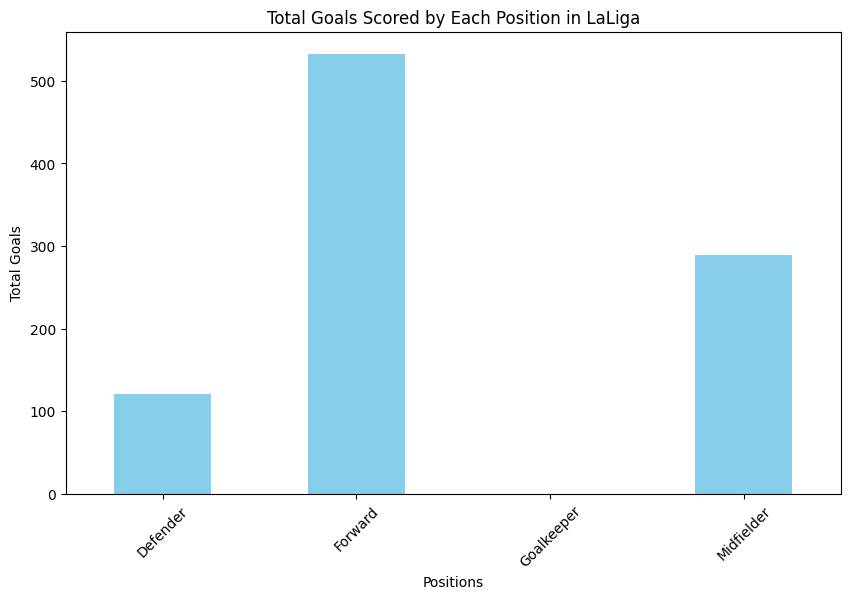

In [88]:
# Group by positions and sum the goals
grouped_data = data1.groupby('Position')['Goals scored'].sum()
  

# Plotting
grouped_data.plot(kind='bar', figsize=(10, 6), color='skyblue')


plt.xlabel('Positions')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Position in LaLiga')
plt.xticks(rotation=45)
plt.show()

In [89]:
data1.Position.value_counts()

Position
Midfielder    220
Defender      185
Forward        94
Goalkeeper     57
Name: count, dtype: int64

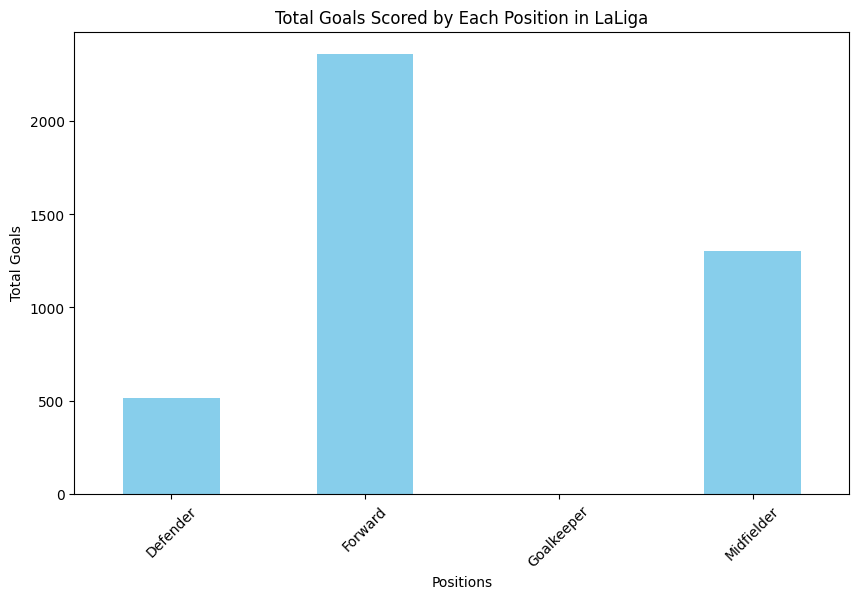

In [10]:
# Group by positions and sum the goals
grouped_data = data2.groupby('Position')['Goals'].sum()
  

# Plotting
grouped_data.plot(kind='bar', figsize=(10, 6), color='skyblue')


plt.xlabel('Positions')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Position in LaLiga')
plt.xticks(rotation=45)
plt.show()

In [9]:
data2.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Libraries for measuring classifier performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
null_counts = data2.isnull().sum().to_frame(name='Null Count').transpose()
null_counts


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
Null Count,0,8,0,0,1,1,0,0,0,0,262,69,69,69,262,262,262,262,262,69,262,309,309,69,181,378,69,69,69,69,378,181,181,181,181,181,181,309,112,0,0,0,69,69,181,181,112,502,502,502,502,502,502,502,502,0,0,0,69


In [29]:
data1.isnull().sum()

Team                         0
Position                     0
Shirt number                30
Name                         0
Minutes played               0
                            ..
Passes                       0
Short passes                 0
Long passes                  0
Through balls                0
Goals scored per attempt     0
Length: 62, dtype: int64

In [30]:
data2.isnull().sum()

Name                        0
Jersey Number               8
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Headed goals               69
Goals with right foot      69
Goals with left foot       69
Penalties scored          262
Freekicks scored          262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Hit woodwork               69
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Last man tackles          378
Blocked shots              69
Interceptions              69
Clearances                 69
Headed Clearance           69
Clearances off line       378
Recoveries                181
Duels won                 181
Duels lost

In [31]:
def process_dataframe(df):
    # Separate numerical and categorical columns
    numerical_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(exclude=['number']).columns

    # Replace null values in numerical columns with their mean
    for col in numerical_columns:
        df[col].fillna(df[col].mean(), inplace=True)

    # Replace null values in categorical columns with their mode
    for col in categorical_columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

    return df

In [32]:
data1_clean = process_dataframe(data1)
data2_clean = process_dataframe(data2)

In [33]:
data1.isnull().sum()
data2.isnull().sum()

Name                      0
Jersey Number             0
Club                      0
Position                  0
Nationality               0
Age                       0
Appearances               0
Wins                      0
Losses                    0
Goals                     0
Goals per match           0
Headed goals              0
Goals with right foot     0
Goals with left foot      0
Penalties scored          0
Freekicks scored          0
Shots                     0
Shots on target           0
Shooting accuracy %       0
Hit woodwork              0
Big chances missed        0
Clean sheets              0
Goals conceded            0
Tackles                   0
Tackle success %          0
Last man tackles          0
Blocked shots             0
Interceptions             0
Clearances                0
Headed Clearance          0
Clearances off line       0
Recoveries                0
Duels won                 0
Duels lost                0
Successful 50/50s         0
Aerial battles won  

In [40]:
data1_clean.select_dtypes(exclude=['number']).columns

Index(['Team', 'Position', 'Name', 'Percentage of games played',
       'Percentage of full games played', 'Percentage of games started',
       'Percentage of games where substituted'],
      dtype='object')

In [39]:
data2.drop(["Nationality",'Name','Club'],axis=1,inplace = True)

In [ ]:
data

In [41]:
data1.drop(["Team",'Name'],axis=1,inplace = True)

In [81]:
X_data1=data1.drop(["Goals scored","Goals scored.1"],axis=1)
y_data1=data1["Goals scored"]

X_data2=data2.drop("Goals",axis=1)
y_data2=data2["Goals"]

In [80]:
X_data1

,Shirt number,Minutes played,Games played,Full games played,Games started,Games where substituted,Yellow Cards,Red Cards,Second Yellows,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt,Position_Defender,Position_Forward,Position_Goalkeeper,Position_Midfielder,Percentage of games played_0.00%,Percentage of games played_100.00%,Percentage of games played_11.00%,Percentage of games played_13.00%,Percentage of games played_16.00%,Percentage of games played_18.00%,Percentage of games played_21.00%,Percentage of games played_24.00%,Percentage of games played_26.00%,Percentage of games played_29.00%,Percentage of games played_3.00%,Percentage of games played_32.00%,Percentage of games played_34.00%,Percentage of games played_37.00%,Percentage of games played_39.00%,Percentage of games played_42.00%,Percentage of games played_45.00%,Percentage of games played_47.00%,Percentage of games played_5.00%,Percentage of games played_50.00%,Percentage of games played_53.00%,Percentage of games played_55.00%,Percentage of games played_58.00%,Percentage of games played_61.00%,Percentage of games played_63.00%,Percentage of games played_66.00%,Percentage of games played_68.00%,Percentage of games played_71.00%,Percentage of games played_74.00%,Percentage of games played_76.00%,Percentage of games played_79.00%,Percentage of games played_8.00%,Percentage of games played_82.00%,Percentage of games played_84.00%,Percentage of games played_87.00%,Percentage of games played_89.00%,Percentage of games played_92.00%,Percentage of games played_95.00%,Percentage of games played_97.00%,Percentage of full games played_0.00%,Percentage of full games played_100.00%,Percentage of full games played_11.00%,Percentage of full games played_13.00%,Percentage of full games played_16.00%,Percentage of full games played_18.00%,Percentage of full games played_21.00%,Percentage of full games played_24.00%,Percentage of full games played_26.00%,Percentage of full games played_29.00%,Percentage of full games played_3.00%,Percentage of full games played_32.00%,Percentage of full games played_34.00%,Percentage of full games played_37.00%,Percentage of full games played_39.00%,Percentage of full games played_42.00%,Percentage of full games played_45.00%,Percentage of full games played_47.00%,Percentage of full games played_5.00%,Percentage of full games played_50.00%,Percentage of full games played_53.00%,Percentage of full games played_55.00%,Percentage of full games played_58.00%,Percentage of full games played_61.00%,Percentage of full games played_63.00%,Percentage of full games played_66.00%,Percentage of full games played_68.00%,Percentage of full games played_71.00%,Percentage of full games played_74.00%,Percentage of full games played_76.00%,Percentage of full games played_79.00%,Percentage of full games played_8.00%,Percentage of full games played_82.00%,Percentage of full games played_84.00%,Percentage of full games played_87.00%,Percentage of full games played_89.00%,Percentage of full games played_92.00%,Percentage of full games played_95.00%,Percentage of full games played_97.00%,Percentage of games started_0.00%,Percentage of games started_100.00%,Percentage of games started_11.00%,Percentage of games started_13.00%,Percentage of games started_16.00%,Percentage of games started_18.00%,P

In [60]:
obj_feat = list(X_data1.loc[:, X_data1.dtypes == 'object'].columns.values)
for feature in obj_feat:
    X_data1[feature] = pd.Series(X_data1[feature], dtype="category")



In [82]:
X_data1=pd.get_dummies(X_data1)

In [85]:
X_data2=pd.get_dummies(X_data2)

In [56]:
import numpy as np

In [68]:
from lightgbm import LGBMRegressor

In [83]:
def ML_algo(X,y):

    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
    Scaler_X = StandardScaler()
    X_train = Scaler_X.fit_transform(X_train)
    X_test = Scaler_X.transform(X_test) 

    model= LGBMRegressor()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    from sklearn.metrics import mean_squared_error

    mse= mean_squared_error(y_test,y_pred)
    print(mse)
    feature_importance = model.feature_importances_

# Step 3: Visualize the feature importance
    feature_names = list(X.columns)
    feature_importance_dict = dict(zip(feature_names, feature_importance))

    sorted_feature_importance = sorted(
    feature_importance_dict.items(), key=lambda x: x[1], reverse=False
)

    sorted_features = [x[0] for x in sorted_feature_importance]
    sorted_importance = [x[1] for x in sorted_feature_importance]

    plt.figure(figsize=(10, 30))
    plt.barh(sorted_features,sorted_importance)
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance from LightGBM')
    plt.tight_layout()
    plt.show()






[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2186
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 66
[LightGBM] [Info] Start training from score 1.683805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

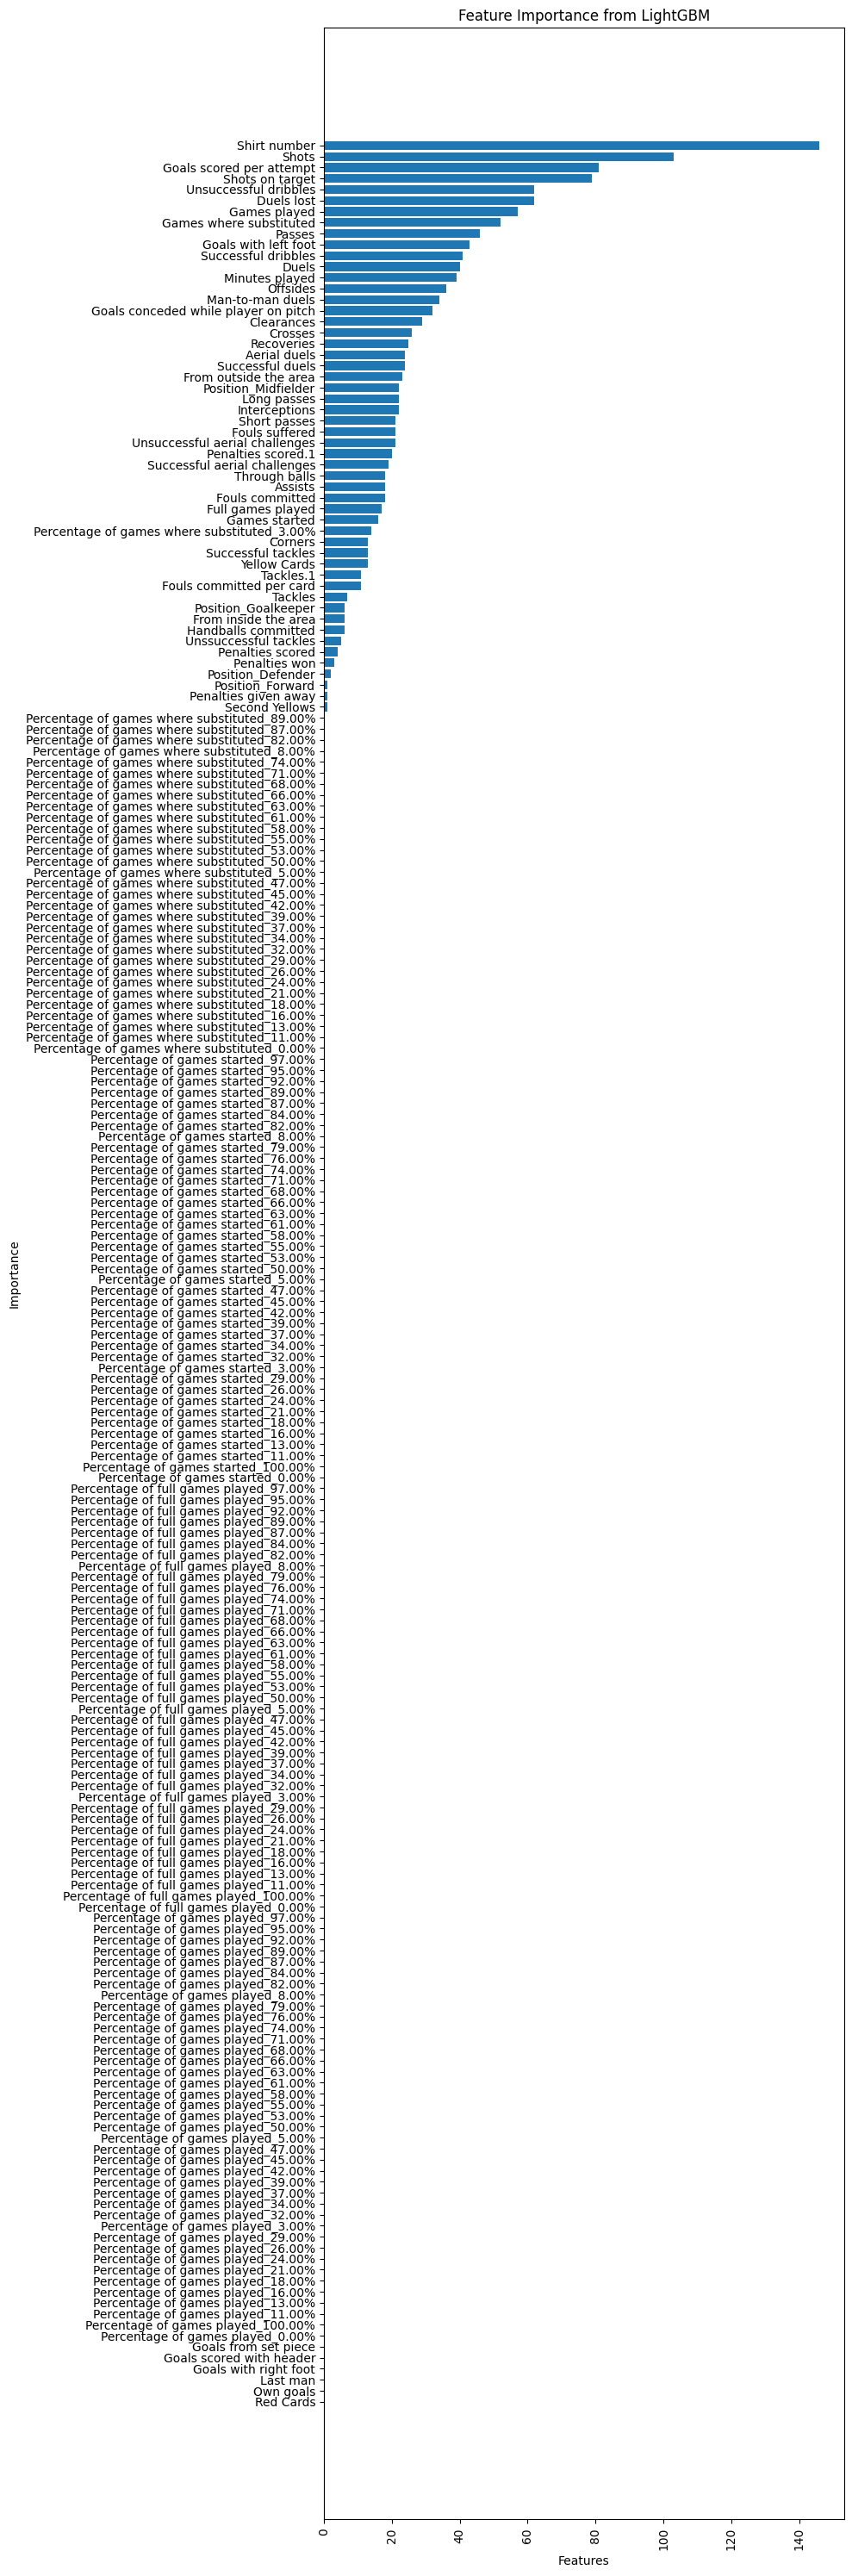

In [84]:
ML_algo(X_data1,y_data1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 399, number of used features: 58
[LightGBM] [Info] Start training from score 8.135338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

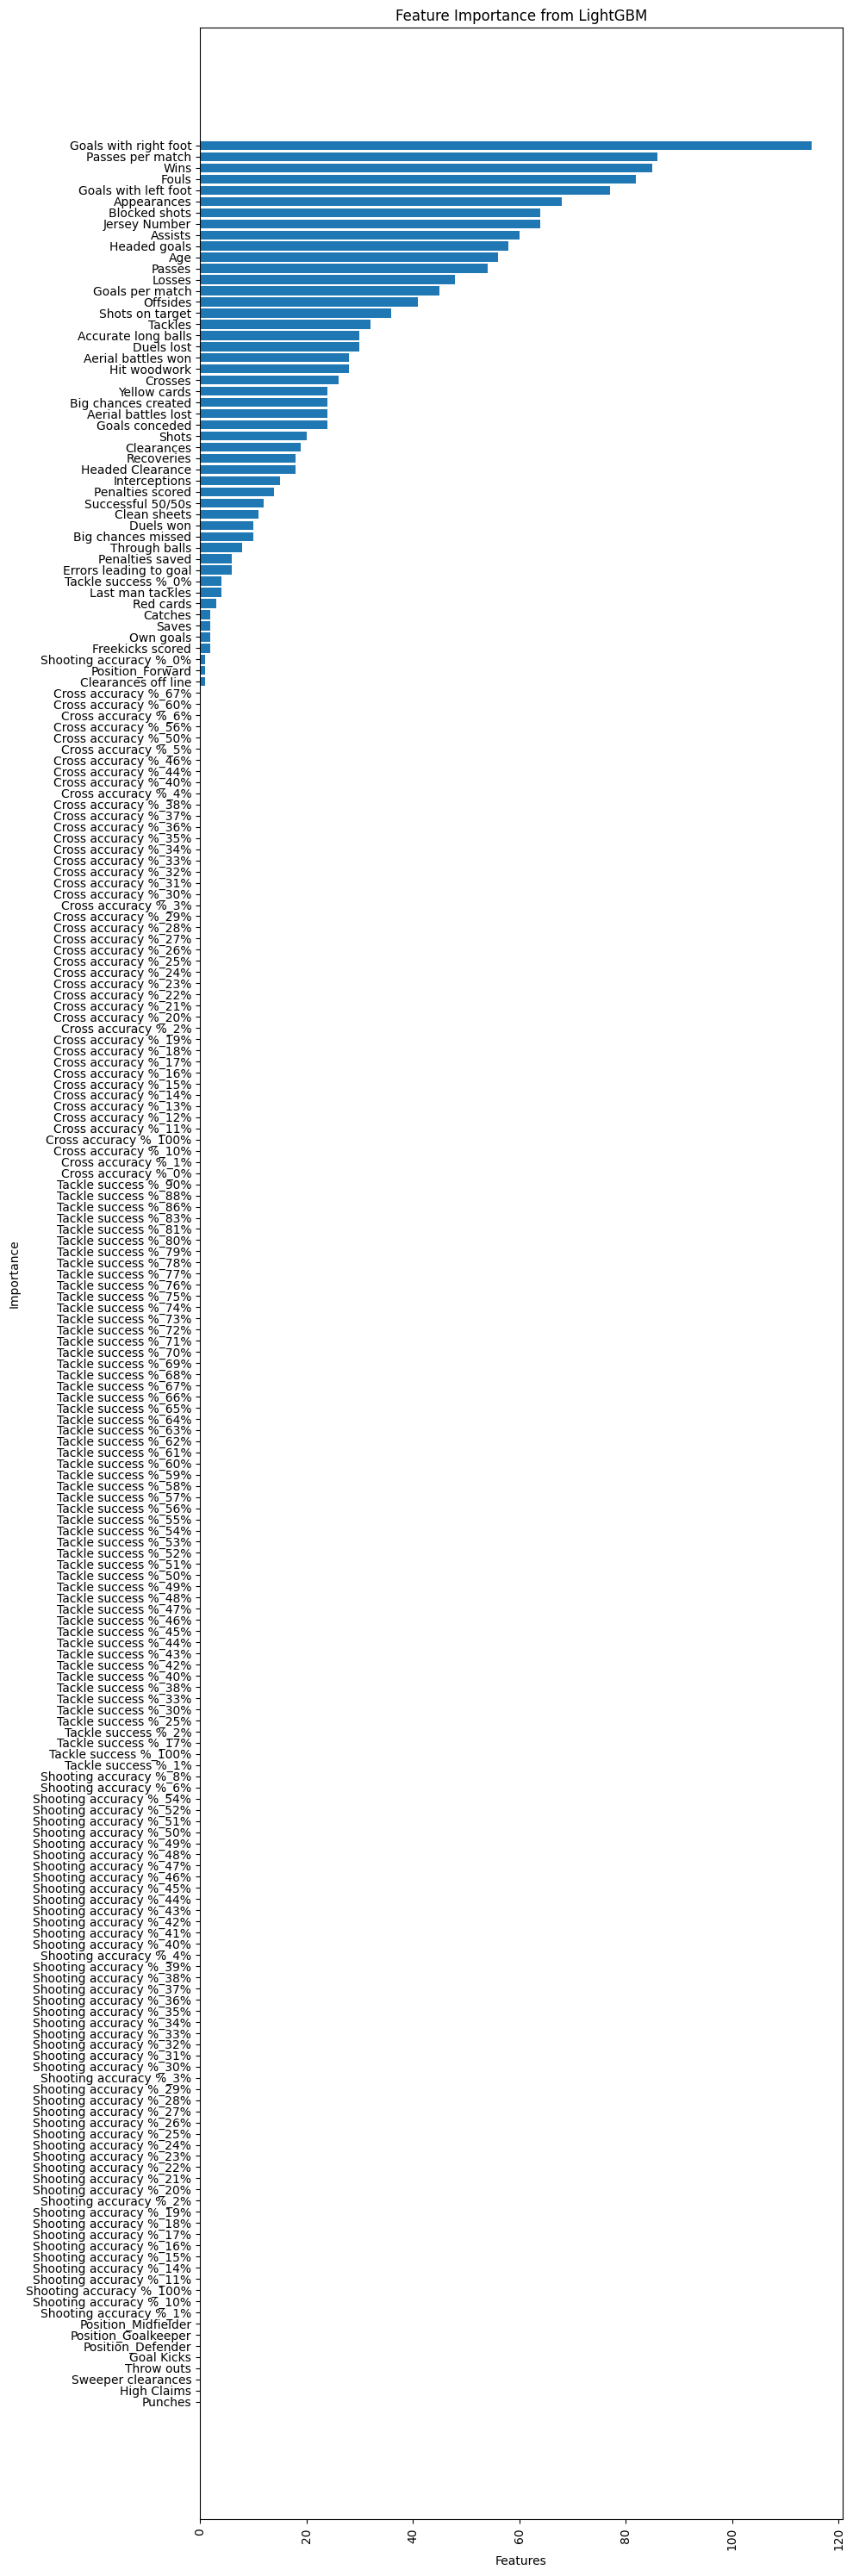

In [86]:
ML_algo(X_data2,y_data2)